# Covariance and Correlation


These statistics measure the spread or dispersion of a **single random variable** ($X$):

* **Variance ($\sigma^2$):** Defined as the **expectation of the squared deviation from the mean** ($\bar{x}$) of a random variable. It quantifies how far the data points are from the average.
   $$\sigma^2 = \frac{1}{N}\sum(x-\bar{x})^2$$

* **Standard Deviation ($\sigma$):** Obtained as the **square root of the variance**. It is easier to interpret than variance because it is expressed in the original units of the data.

***

## Covariance and Correlation: Measuring Relationships

These statistics measure the relationship or dependency **between two random variables** ($X$ and $Y$):

### Covariance

**Covariance** measures the extent to which two variables change together.

* **Formula:** It is the average of the products of the deviations of each variable from its mean.
    $$\text{Cov}(x, y) = \frac{1}{N} \sum_{i=1}^{N}(x_i - \bar{x}) (y_i - \bar{y})$$
* **Indicates Direction:** The sign of the covariance indicates the **direction** of the linear relationship:
    * **Positive:** Both variables tend to increase or decrease together.
    * **Negative:** As one variable increases, the other tends to decrease.
* **Limitation:** The magnitude of covariance is unstandardized, making it difficult to judge the strength of the relationship.

### Correlation (Pearson's $\rho$)

**Correlation** (specifically Pearson's $\rho$) is a normalized measure of the linear relationship between two variables.

* **Formula:** It is calculated by **dividing the covariance by the product of the variables' standard deviations**, which standardizes the measure.
    $$\rho_{x,y} = \frac{\text{Cov}(x, y)}{\sigma_x\sigma_y}$$
* **Measures Both Strength and Direction:**
    * **Direction:** The sign ($\text{+}$ or $-$) indicates the direction (same as covariance).
    * **Strength:** The value is always between $-1$ and $+1$. Values closer to $1$ or $-1$ indicate a **stronger** linear relationship.

***

## Covariance Matrix

A **covariance matrix** is a square matrix that summarizes the covariance between every pair of elements in a given random vector.

* For a two-variable system ($X$ and $Y$), the matrix is $2 \times 2$:
    $$\begin{bmatrix} \text{Var}(X) & \text{Cov}(X, Y) \\ \text{Cov}(Y, X) & \text{Var}(Y) \end{bmatrix}$$
* **Symmetry:** Since $\text{Cov}(X, Y) = \text{Cov}(Y, X)$, the matrix is symmetric. The main diagonal contains the **variances** of the individual variables, and the off-diagonal elements contain the **covariances** between the pairs.

x: mean: 100.13675989177295, std: 19.605430059932537, var: 385.1431741832729
noise: mean: 50.31826117056003, std: 9.770187084920876
y: mean: 150.45502106233297, std: 21.232997276217507, var: 451.74366065316633
Covariance matrix: [385.14317418 370.61949173 370.61949173 451.74366065]
Explanation: var(x), covar(x,y), covar(x,y), var(y)
correlation coefficient numerator:  370.61949172966524
correlation coefficient denominator:  416.2820430616204
r:  0.8903086210586414
Pearsons r: 0.888528003816524, p: 1.2682871498586671e-170


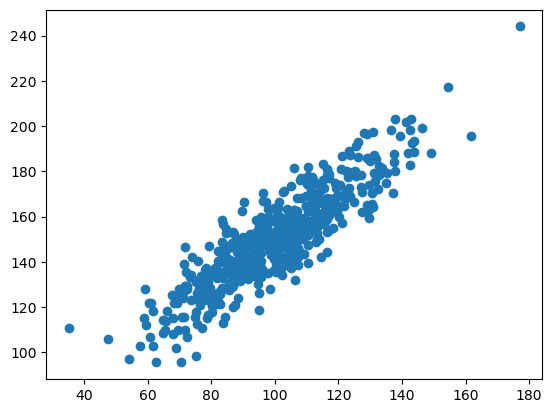

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

np.random.seed(42)
n = 500

# x has a mean around 100 and a std of 20
# y equals Gaussian noise with a mean around 50 and a std of 10 added to x
x = 20 * np.random.randn(n) + 100
noise = 10 * np.random.randn(n) + 50
y = x + noise
print(f'x: mean: {np.mean(x)}, std: {np.std(x)}, var: {np.var(x, ddof=1)}')
print(f'noise: mean: {np.mean(noise)}, std: {np.std(noise)}')
print(f'y: mean: {np.mean(y)}, std: {np.std(y)}, var: {np.var(y, ddof=1)}')

print(f'Covariance matrix: {np.cov(x, y).flatten()}')
print('Explanation: var(x), covar(x,y), covar(x,y), var(y)')
numerator = np.sum((x - np.mean(x)) * (y - np.mean(y)))/(n-1)
print('correlation coefficient numerator: ', numerator)
denominator = np.std(x) * np.std(y)
print('correlation coefficient denominator: ', denominator)
print('r: ', numerator/denominator)

corr, p = pearsonr(x, y)
print(f'Pearsons r: {corr}, p: {p}')

plt.scatter(x, y)
plt.show()

The p-value is a possible guide to rejecting or failing to reject the null hypothesis which states that there is no relationship between x and y

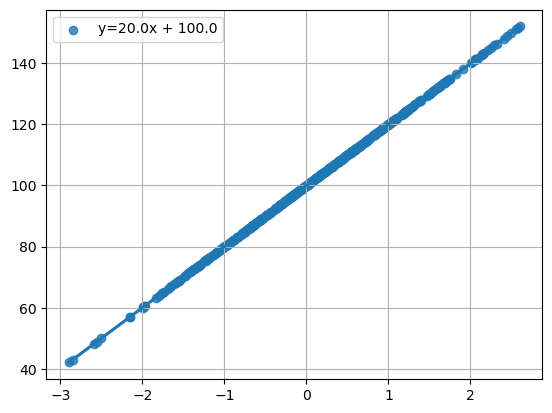

In [ ]:
# https://stackoverflow.com/questions/45902739/annotate-the-linear-regression-equation
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

x = np.random.randn(n)
y = 20 * x + 100
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

sns.regplot(x=x, y=y, label=f'y={slope.round(0)}x + {intercept.round(0)}')
plt.grid()
plt.legend()
plt.show()

When x is meaningless (0), the mean becomes evident

x: mean: 100.66375889316056, std: 19.661631349943185, var: 387.35445625357585
y: mean: 99.769672782738, std: 19.172122073360807, var: 368.3068785529545
Covariance matrix: [387.35445625 -33.14773965 -33.14773965 368.30687855]
Pearsons r: -0.0877596183384533, p: 0.049851201631425396


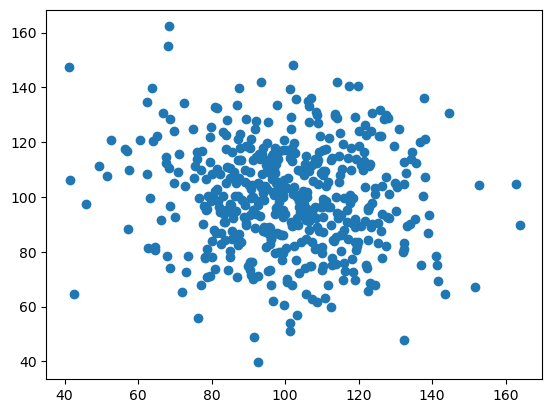

In [ ]:
# uncorrelated datasets
x = 20 * np.random.randn(n) + 100
y = 20 * np.random.randn(n) + 100
print(f'x: mean: {np.mean(x)}, std: {np.std(x)}, var: {np.var(x, ddof=1)}')
print(f'y: mean: {np.mean(y)}, std: {np.std(y)}, var: {np.var(y, ddof=1)}')

print(f'Covariance matrix: {np.cov(x, y).flatten()}')

corr, p = pearsonr(x, y)
print(f'Pearsons r: {corr}, p: {p}')

plt.scatter(x, y)
plt.show()

### Hi Lo Covariance

* A high covariance shows a strong relationship between two variables, whereas a low covariance shows a weak relationship. In a financial context, covariance relates to the returns on two different investments over time when compared to different variables, like stocks or other marketable securities.
* https://www.indeed.com/career-advice/career-development/covariance-vs-variance
* Covariance measures the directional relationship between the returns on two assets. A positive covariance means asset returns move together, while a negative covariance means they move inversely.
* Covariance is calculated by analyzing at-return surprises (standard deviations from the expected return) or multiplying the correlation between the two random variables by the standard deviation of each variable.
* https://www.investopedia.com/terms/c/covariance.asp
* $cov(x, y) = \frac{1}{N} \sum_{i=1}^{N}(x_i - \bar{x}) (y_i - \bar{y})$

x: mean: 0.023184789975148917, std: 1.0064305909826006, var: 1.0149323992641146
y: mean: 99.62947322946222, std: 20.74700627824966, var: 431.3008712522353
Covariance matrix: [  1.0149324   -1.2286639   -1.2286639  431.30087125]
Pearsons r: -0.058725181894786524, p: 0.18986453023459057


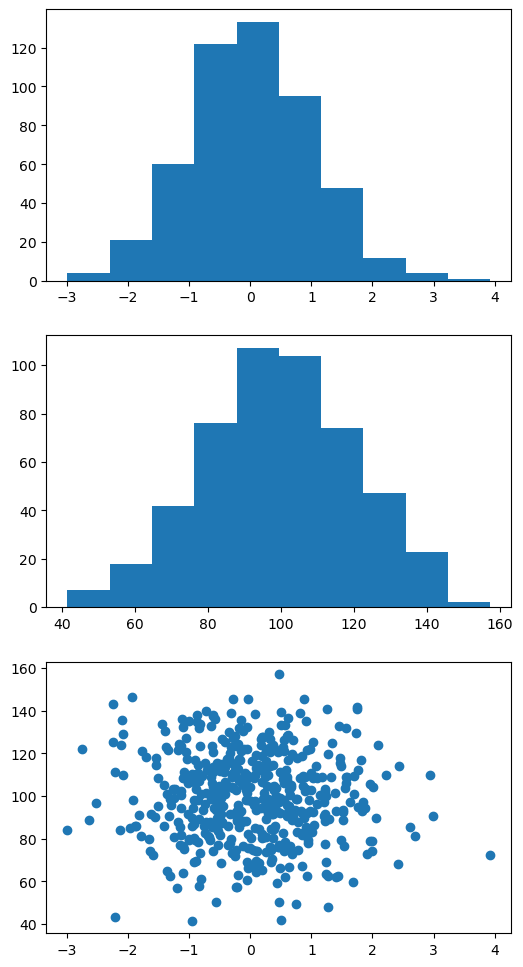

In [ ]:
# uncorrelated datasets
x = np.random.randn(n)
y = 20 * np.random.randn(n) + 100
print(f'x: mean: {np.mean(x)}, std: {np.std(x)}, var: {np.var(x, ddof=1)}')
print(f'y: mean: {np.mean(y)}, std: {np.std(y)}, var: {np.var(y, ddof=1)}')

print(f'Covariance matrix: {np.cov(x, y).flatten()}')

corr, p = pearsonr(x, y)
print(f'Pearsons r: {corr}, p: {p}')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 12))
ax1.hist(x)
ax2.hist(y)
ax3.scatter(x, y)
plt.show()

### Hi Lo Variance

* A large variance indicates that numbers in the set are far from the mean and far from each other. A small variance, on the other hand, indicates the opposite. A variance value of zero, though, indicates that all values within a set of numbers are identical. Every variance that isn’t zero is a positive number. A variance cannot be negative. That’s because it’s mathematically impossible since you can’t have a negative value resulting from a square.
* https://medium.com/@rsehrawat75/univariate-analysis-b938c14ad787
* $\sigma^2 = \frac{1}{N}\sum({x}-\bar{x})^2$

### Incrementing StDev

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

np.random.seed(42)
n = 500

x = 1 * np.random.randn(n) + 0

for s in range(1, 20):
    noise = s * np.random.randn(n) + 0
    y = x + noise

    numerator = np.sum((x - np.mean(x)) * (y - np.mean(y)))/(n-1)
    print('correlation coefficient numerator: ', numerator)
    denominator = np.std(x) * np.std(y)
    print('correlation coefficient denominator: ', denominator)
    print('r: ', numerator/denominator)
    print()


correlation coefficient numerator:  0.8902395231901437
correlation coefficient denominator:  1.3043695454682753
r:  0.6825056030195362

correlation coefficient numerator:  0.8482815658706048
correlation coefficient denominator:  2.1491128046922974
r:  0.3947124432084238

correlation coefficient numerator:  1.148661789996774
correlation coefficient denominator:  3.1045124257357037
r:  0.3699974851041433

correlation coefficient numerator:  0.9317130606258498
correlation coefficient denominator:  3.87195798426004
r:  0.24063098422384022

correlation coefficient numerator:  1.119904997967232
correlation coefficient denominator:  5.055479924375529
r:  0.22152298391444342

correlation coefficient numerator:  1.1110413774799395
correlation coefficient denominator:  6.199483026489989
r:  0.17921516564083356

correlation coefficient numerator:  0.9844610914433318
correlation coefficient denominator:  7.039010864092216
r:  0.13985787356364487

correlation coefficient numerator:  0.5455390610511

<AxesSubplot: ylabel='Density'>

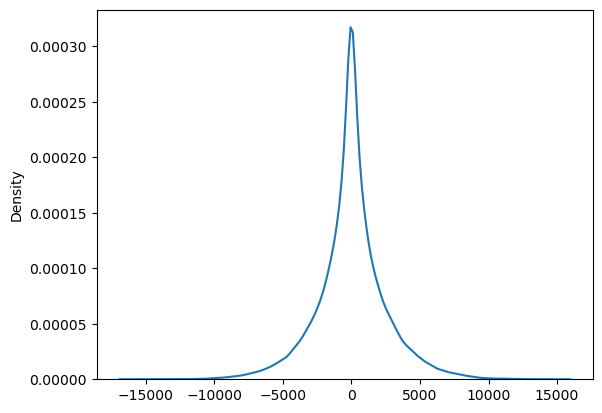

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

np.random.seed(42)
n = 500

x = 1 * np.random.randn(n) + 0
numerators = []

for s in range(1, 100000):
    noise = s * np.random.randn(n) + 0
    y = x + noise

    numerator = np.sum((x - np.mean(x)) * (y - np.mean(y)))/(n-1)
    numerators.append(numerator)


sns.kdeplot(numerators)

<AxesSubplot: ylabel='Density'>

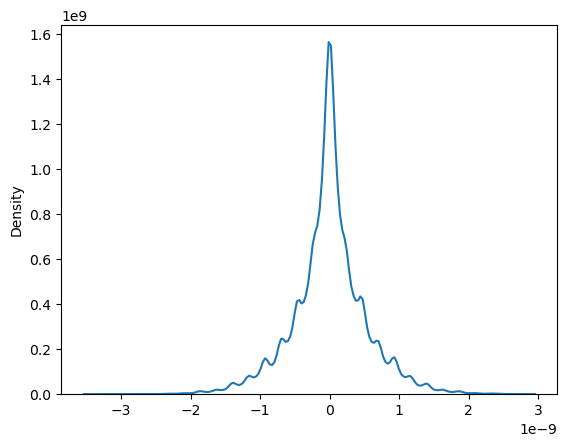

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

np.random.seed(42)
n = 500

x = 1 * np.random.randn(n) + 0
yvars = []

for s in range(1, 100000):
    noise = s * np.random.randn(n) + 0
    y = x + noise
    yvar = np.sum(y - np.mean(y))
    yvars.append(yvar)


sns.kdeplot(yvars)

https://demonstrations.wolfram.com/GeneralizedCentralLimitTheorem/